In [96]:
import numpy as np
import sympy
from milad import geometric, invariants
NUM_PARTICLES = 8
ORDER = 10
NUM_INVARIANTS = 64

sympy.init_printing()

In [97]:
m = geometric.from_deltas_analytic(ORDER, NUM_PARTICLES)

In [98]:
r = sympy.IndexedBase('r')
w = sympy.IndexedBase('w')

In [99]:
m[2, 1, 3].diff(r[1,0])

In [100]:
invs = invariants.read(read_max=NUM_INVARIANTS)
result = sympy.Array(invs.apply(m))

In [36]:
weight_vars = sympy.Array([w[i] for i in range(NUM_PARTICLES)])
weight_vars

In [37]:
sympy.derive_by_array(result[0], weight_vars)

In [38]:
r_vars_list = []
for i in range(NUM_PARTICLES):
    r_vars_list.extend(list(r[i, dim] for dim in range(3)))
r_vars = sympy.Array(r_vars_list)
r_vars

[r[0, 0]  r[0, 1]  r[0, 2]  r[1, 0]  r[1, 1]  r[1, 2]  r[2, 0]  r[2, 1]  r[2, 
2]  r[3, 0]  r[3, 1]  r[3, 2]  r[4, 0]  r[4, 1]  r[4, 2]  r[5, 0]  r[5, 1]  r[
5, 2]  r[6, 0]  r[6, 1]  r[6, 2]  r[7, 0]  r[7, 1]  r[7, 2]]

In [39]:
import itertools
all_vars = sympy.Array(itertools.chain(weight_vars, r_vars))

In [40]:
derivs = sympy.derive_by_array(result[0], all_vars)

In [41]:
weights = np.random.rand(NUM_PARTICLES)
positions = np.random.rand(NUM_PARTICLES, 3)

In [42]:
conc = np.concatenate((weights, positions.reshape(NUM_PARTICLES * 3)))
zipped = list(zip(all_vars, conc))

In [43]:
result[0].subs(zipped)

In [44]:
derivs[0].subs(zipped)

In [45]:
result[0].subs([w, weights])

KeyboardInterrupt: 

In [ ]:
from sympy.utilities.lambdify import lambdify, lambdastr
func = lambdify('r, w', result[0])

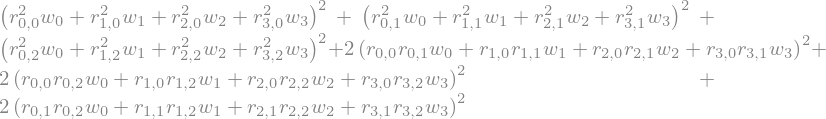

In [10]:
result[2]

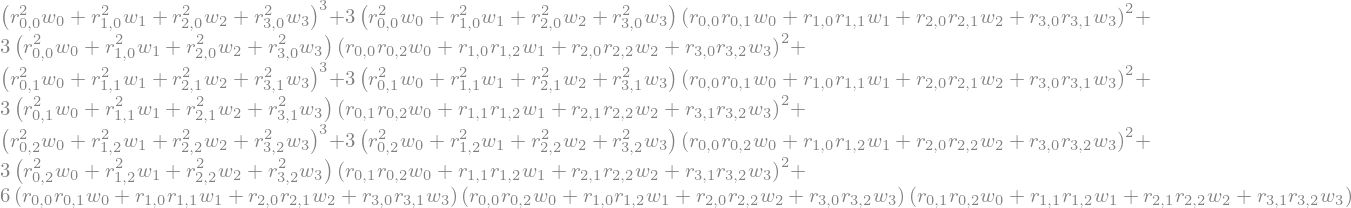

In [12]:
sympy.simplify(result[2])

In [26]:
eqn = sympy.simplify(result[6])

In [46]:
res = sympy.derive_by_array(result[9], all_vars)

In [89]:
m = sympy.IndexedBase('m')
phi = sympy.Array(invs.apply(m))

In [90]:
phi[17].free_symbols

In [91]:
stored = sympy.derive_by_array(phi, phi.free_symbols)

In [95]:
all_free = phi.free_symbols
derivs = []
for entry in phi:
    for symbol in all_free:
        if symbol not in entry.free_symbols:
            continue
        derivs.append(entry.diff(symbol))

In [108]:
r[3,5].indices